This is based on IGTD process published from this work https://github.com/zhuyitan/IGTD to generate image files using tabular data

In [1]:
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler
from IGTD_Functions import min_max_transform, table_to_image

### Load preprocessed dataset

In [2]:
dataset = pd.read_csv("../data/ML_data_EtOH_01102022.csv")
dataset.head()

,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Ligand,Ligand_inchi,Product_inchi,Solvent_inchi,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,50.731606,50.731606,351.19888,1.840787,-0.055960,A-paPhos,InChI=1S/C20H20NP/c1-21(2)17-13-15-20(16-14-17...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",87.13
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,80.673770,61.935337,479.46484,1.803143,-0.058457,CX-FBu,InChI=1S/C29H39P.BF4/c1-2-3-22-29(27-20-12-10-...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",6.37
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,107.755370,56.694310,386.44120,1.805810,-0.058387,CX-PCy,InChI=1S/C22H30NP/c1-4-11-19(12-5-1)23-18-10-1...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",71.75
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,117.597336,54.091050,618.03375,1.817123,-0.054418,Cy-BippyPhos,InChI=1S/C36H39N4P/c1-6-16-28(17-7-1)34-36(35(...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",64.52
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,111.484024,57.033180,402.37967,1.816461,-0.061351,Cy-JohnPhos,InChI=1S/C24H31P/c1-4-12-20(13-5-1)23-18-10-11...,InChI=1S/C8H8BNO2/c11-9(12)7-1-2-8-6(5-7)3-4-1...,"InChI=1S/C2H6O/c1-2-3/h3H,2H2,1H3",80.44


### Prepare external set

In [3]:
dataset.Electrophile.unique().tolist()

['1H-indol-5-yl\xa0N,N-dimethylsulfamate',
 "2-bromo-1,1'-biphenyl",
 '2-Chloro-5-fluorotoluene',
 '2-Chloro-m-xylene',
 '(2-Methyl-1,3-benzothiazol-5-yl)\xa0N,N-dimethylsulfamate',
 '3-Bromothiophene',
 '3-Chloro-2-methylaniline',
 '4-Bromoanisole',
 '4-Bromobenzotrifluoride',
 '4-Chloro-N,N-dimethylbenzamide',
 '5-chloroindole',
 'BMS-929356',
 'Ethyl\xa04-chloro-3-fluorobenzoate',
 'methyl\xa04-bromobenzoate',
 'quinolin-6-yl dimethylsulfamate',
 '3-Bromoquinoline',
 '3-bromo-2-methylpyridine',
 'Clofibrate',
 '4-Bromo-2-fluoroanisole',
 '4-Bromo-2-fluorobenzonitrile',
 '(4-Phenylphenyl) N,N-dimethylsulfamate',
 '4-Bromo-1,2-(methylenedioxy)benzene',
 '5-Bromobenzofuran',
 '4-chloro-1-fluoro-2-methoxybenzene',
 '4-chlorobenzotrifluoride',
 '3-chloroquinoline',
 '5-bromo-2,4-dimethoxypyrimidine']

In [5]:
indices=[0,12,17]
mapped = map(dataset.Electrophile.unique().tolist().__getitem__, indices)
list(mapped)

['1H-indol-5-yl\xa0N,N-dimethylsulfamate',
 'Ethyl\xa04-chloro-3-fluorobenzoate',
 'Clofibrate']

In [6]:
indices=[0,12,17]
mapped = map(dataset.Electrophile.unique().tolist().__getitem__, indices)
external_list=list(mapped)
ML_data_validation = dataset[dataset['Electrophile'].isin(external_list)]
ML_data_validation2 = ML_data_validation.drop(['Electrophile_inchi', 'Solvent_inchi', 'Ligand_inchi', 'Product_inchi', 'Electrophile', 'Ligand'], axis = 1)
print (ML_data_validation2.shape)
ML_data_validation2.head()

(69, 157)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_qvtot_min_min,Kraken_vbur_qvtot_min_vburminconf,Kraken_vbur_ratio_vbur_vtot_boltz,Kraken_vbur_vbur_boltz,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,59.829678,59.829678,0.144453,50.731606,50.731606,50.731606,351.19888,1.840787,-0.055960,87.13
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,47.895260,67.167030,0.134809,64.636100,80.673770,61.935337,479.46484,1.803143,-0.058457,6.37
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,36.894516,75.417816,0.211005,81.541550,107.755370,56.694310,386.44120,1.805810,-0.058387,71.75
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,45.164505,77.044235,0.160584,99.246600,117.597336,54.091050,618.03375,1.817123,-0.054418,64.52
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,44.561430,72.197180,0.212084,85.339290,111.484024,57.033180,402.37967,1.816461,-0.061351,80.44


In [7]:
exclude_list = ML_data_validation.index.values.tolist()
exclude_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 281,
 282,
 283,
 284,
 285,
 286,
 287,
 288,
 289,
 290,
 291,
 292,
 293,
 294,
 295,
 388,
 389,
 390,
 391,
 392,
 393,
 394,
 395,
 396,
 397,
 398,
 399,
 400,
 401,
 402,
 403,
 404,
 405,
 406,
 407,
 408,
 409,
 410]

In [8]:
#Use all the dataset for image generation  
ML_data_traintest2 = dataset.drop(['Electrophile_inchi', 'Solvent_inchi', 'Ligand_inchi', 'Product_inchi', 'Electrophile', 'Ligand'], axis = 1)
print (ML_data_traintest2.shape)
ML_data_traintest2.head()

(618, 157)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_qvtot_min_min,Kraken_vbur_qvtot_min_vburminconf,Kraken_vbur_ratio_vbur_vtot_boltz,Kraken_vbur_vbur_boltz,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz,Yield
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,59.829678,59.829678,0.144453,50.731606,50.731606,50.731606,351.19888,1.840787,-0.055960,87.13
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,47.895260,67.167030,0.134809,64.636100,80.673770,61.935337,479.46484,1.803143,-0.058457,6.37
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,36.894516,75.417816,0.211005,81.541550,107.755370,56.694310,386.44120,1.805810,-0.058387,71.75
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,45.164505,77.044235,0.160584,99.246600,117.597336,54.091050,618.03375,1.817123,-0.054418,64.52
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,44.561430,72.197180,0.212084,85.339290,111.484024,57.033180,402.37967,1.816461,-0.061351,80.44


### Image preparation

In [9]:
#Total 156 features in the dataset, we will have to use

import math
math.sqrt(156)

12.489995996796797

In [10]:
#we can factor into 13*12

In [11]:
num_row = 13    # Number of pixel rows in image representation
num_col = 12    # Number of pixel columns in image representation
num = num_row * num_col # Number of features to be included for analysis, which is also the total number of pixels in image representation
save_image_size = 3 # Size of pictures (in inches) saved during the execution of IGTD algorithm.
max_step = 10000    # The maximum number of iterations to run the IGTD algorithm, if it does not converge.
val_step = 300  # The number of iterations for determining algorithm convergence. If the error reduction rate
                # is smaller than a pre-set threshold for val_step itertions, the algorithm converges.

In [12]:
Data_X = ML_data_traintest2.drop(columns=['Yield'])
print (Data_X.shape)
Data_X.head()

(618, 156)


,ArylHalide_CX_Lowdin,ArylHalide_C_Chem Shift,ArylHalide_C_Electrostatic,ArylHalide_C_Exposed Area,ArylHalide_C_Mulliken,ArylHalide_XY_Chem Shift_Max,ArylHalide_XY_Chem Shift_Min,ArylHalide_XY_Electrostatic_Max,ArylHalide_XY_Electrostatic_Min,ArylHalide_XY_Exposed Area_Avg,...,Kraken_vbur_qvtot_min_max,Kraken_vbur_qvtot_min_min,Kraken_vbur_qvtot_min_vburminconf,Kraken_vbur_ratio_vbur_vtot_boltz,Kraken_vbur_vbur_boltz,Kraken_vbur_vbur_max,Kraken_vbur_vbur_min,Kraken_vbur_vtot_boltz,Kraken_vmin_r_boltz,Kraken_vmin_vmin_boltz
0,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,59.829678,59.829678,59.829678,0.144453,50.731606,50.731606,50.731606,351.19888,1.840787,-0.055960
1,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,86.890710,47.895260,67.167030,0.134809,64.636100,80.673770,61.935337,479.46484,1.803143,-0.058457
2,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,75.417816,36.894516,75.417816,0.211005,81.541550,107.755370,56.694310,386.44120,1.805810,-0.058387
3,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,90.693040,45.164505,77.044235,0.160584,99.246600,117.597336,54.091050,618.03375,1.817123,-0.054418
4,1.11,140.296,0.33,8.371,0.338,105.274,102.178,-0.291,-0.456,12.9615,...,77.448970,44.561430,72.197180,0.212084,85.339290,111.484024,57.033180,402.37967,1.816461,-0.061351


In [13]:
#norm_data = min_max_transform(Data_X)

#Transform the training set
sc = MinMaxScaler()
norm_data = sc.fit_transform(Data_X)

In [14]:
norm_data

array([[2.22222222e-01, 9.02115401e-01, 8.16682832e-01, ...,
        4.86908864e-01, 6.03746329e-01, 3.72461434e-01],
       [2.22222222e-01, 9.02115401e-01, 8.16682832e-01, ...,
        7.33548769e-01, 2.16432530e-01, 2.86939212e-01],
       [2.22222222e-01, 9.02115401e-01, 8.16682832e-01, ...,
        5.54675577e-01, 2.43871523e-01, 2.89331403e-01],
       ...,
       [2.22222222e-01, 2.10376233e-02, 0.00000000e+00, ...,
        6.80953859e-01, 5.00963024e-01, 3.89843645e-02],
       [2.22222222e-01, 2.10376233e-02, 0.00000000e+00, ...,
        5.55275322e-01, 7.80309032e-01, 8.76799708e-05],
       [2.22222222e-01, 2.10376233e-02, 0.00000000e+00, ...,
        3.93681965e-01, 8.03069743e-01, 6.37193296e-01]])

In [15]:
Data_X.index

RangeIndex(start=0, stop=618, step=1)

In [16]:
norm_data = pd.DataFrame(norm_data, columns=Data_X.columns, index=Data_X.index)

In [17]:
# Run the IGTD algorithm using (1) the Euclidean distance for calculating pairwise feature distances and pariwise pixel
# distances and (2) the absolute function for evaluating the difference between the feature distance ranking matrix and
# the pixel distance ranking matrix. Save the result in All_3 folder.
fea_dist_method = 'Euclidean'
image_dist_method = 'Euclidean'
error = 'abs'
result_dir = '../Results/All_3'
os.makedirs(name=result_dir, exist_ok=True)

In [18]:
table_to_image(norm_data, [num_row, num_col], fea_dist_method, image_dist_method, save_image_size,
               max_step, val_step, result_dir, error)

Step 0 err: 46350266.0
Step 1 err: 46206212.0
Step 2 err: 45889013.0
Step 3 err: 45741021.0
Step 4 err: 45595451.0
Step 5 err: 45503441.0
Step 6 err: 45406978.0
Step 7 err: 45162220.0
Step 8 err: 44889489.0
Step 9 err: 44731891.0
Step 10 err: 44629769.0
Step 11 err: 44482571.0
Step 12 err: 44378689.0
Step 13 err: 44206754.0
Step 14 err: 44119819.0
Step 15 err: 43961235.0
Step 16 err: 43918189.0
Step 17 err: 43840706.0
Step 18 err: 43552302.0
Step 19 err: 43441864.0
Step 20 err: 43217700.0
Step 21 err: 43150308.0
Step 22 err: 43039212.0
Step 23 err: 42833343.0
Step 24 err: 42542102.0
Step 25 err: 42347834.0
Step 26 err: 42040956.0
Step 27 err: 41940196.0
Step 28 err: 41782856.0
Step 29 err: 41760607.0
Step 30 err: 41691481.0
Step 31 err: 41412974.0
Step 32 err: 41297999.0
Step 33 err: 41230424.0
Step 34 err: 40981127.0
Step 35 err: 40794790.0
Step 36 err: 40704898.0
Step 37 err: 40591460.0
Step 38 err: 40470948.0
Step 39 err: 40269194.0
Step 40 err: 40183087.0
Step 41 err: 40050565.0
St

Step 347 err: 19024503.0
Step 348 err: 19023876.0
Step 349 err: 19011612.0
Step 350 err: 19011612.0
Step 351 err: 19011612.0
Step 352 err: 19011612.0
Step 353 err: 19011612.0
Step 354 err: 19006976.0
Step 355 err: 18998626.0
Step 356 err: 18973375.0
Step 357 err: 18973375.0
Step 358 err: 18968615.0
Step 359 err: 18968615.0
Step 360 err: 18968615.0
Step 361 err: 18968615.0
Step 362 err: 18968615.0
Step 363 err: 18961893.0
Step 364 err: 18961893.0
Step 365 err: 18954825.0
Step 366 err: 18954825.0
Step 367 err: 18954825.0
Step 368 err: 18954825.0
Step 369 err: 18948117.0
Step 370 err: 18946450.0
Step 371 err: 18946450.0
Step 372 err: 18946450.0
Step 373 err: 18946450.0
Step 374 err: 18946450.0
Step 375 err: 18946450.0
Step 376 err: 18946450.0
Step 377 err: 18946450.0
Step 378 err: 18946450.0
Step 379 err: 18946450.0
Step 380 err: 18945744.0
Step 381 err: 18940508.0
Step 382 err: 18940508.0
Step 383 err: 18930458.0
Step 384 err: 18926612.0
Step 385 err: 18926612.0
Step 386 err: 18926612.0


Step 687 err: 18449666.0
Step 688 err: 18449666.0
Step 689 err: 18449666.0
Step 690 err: 18449666.0
Step 691 err: 18449666.0
Step 692 err: 18449666.0
Step 693 err: 18449666.0
Step 694 err: 18449666.0
Step 695 err: 18449666.0
Step 696 err: 18449666.0
Step 697 err: 18449666.0
Step 698 err: 18449666.0
Step 699 err: 18449666.0
Step 700 err: 18449666.0
Step 701 err: 18449666.0
Step 702 err: 18449666.0
Step 703 err: 18449666.0
Step 704 err: 18449666.0
Step 705 err: 18449666.0
Step 706 err: 18449666.0
Step 707 err: 18449666.0
Step 708 err: 18449666.0
Step 709 err: 18449666.0
Step 710 err: 18449666.0
Step 711 err: 18449666.0
Step 712 err: 18449666.0
Step 713 err: 18449666.0
Step 714 err: 18449666.0
Step 715 err: 18449666.0
Step 716 err: 18449666.0
Step 717 err: 18449666.0
Step 718 err: 18449666.0
Step 719 err: 18449666.0
Step 720 err: 18449666.0
Step 721 err: 18449666.0
Step 722 err: 18449666.0
Step 723 err: 18449666.0
Step 724 err: 18449666.0
Step 725 err: 18449666.0
Step 726 err: 18449666.0


Step 1022 err: 18446127.0
Step 1023 err: 18446127.0
Step 1024 err: 18446127.0
Step 1025 err: 18446127.0
Step 1026 err: 18446127.0
Step 1027 err: 18446127.0
Step 1028 err: 18446127.0
Step 1029 err: 18446127.0
Step 1030 err: 18446127.0
Step 1031 err: 18446127.0
Step 1032 err: 18446127.0
Step 1033 err: 18446127.0
Step 1034 err: 18446127.0
Step 1035 err: 18446127.0
Step 1036 err: 18446127.0
Step 1037 err: 18446127.0
Step 1038 err: 18446127.0
Step 1039 err: 18446127.0
Step 1040 err: 18446127.0
Step 1041 err: 18446127.0
Step 1042 err: 18446127.0
Step 1043 err: 18446127.0
Step 1044 err: 18446127.0
Step 1045 err: 18446127.0
Step 1046 err: 18446127.0
Step 1047 err: 18446127.0
Step 1048 err: 18446127.0
Step 1049 err: 18446127.0
Step 1050 err: 18446127.0
Step 1051 err: 18446127.0
Step 1052 err: 18446127.0
Step 1053 err: 18446127.0


In [20]:
# Run the IGTD algorithm using (1) the Pearson correlation coefficient for calculating pairwise feature distances,
# (2) the Manhattan distance for calculating pariwise pixel distances, and (3) the square function for evaluating
# the difference between the feature distance ranking matrix and the pixel distance ranking matrix.
# Save the result in All_4 folder.
fea_dist_method = 'Pearson'
image_dist_method = 'Manhattan'
error = 'squared'
result_dir = '../Results/All_4'
os.makedirs(name=result_dir, exist_ok=True)
table_to_image(norm_data, [num_row, num_col], fea_dist_method, image_dist_method, save_image_size,
               max_step, val_step, result_dir, error)

Step 0 err: 255228987723.0
Step 1 err: 251482118496.0
Step 2 err: 248449806467.0
Step 3 err: 247913370935.0
Step 4 err: 247318983009.0
Step 5 err: 245645659964.0
Step 6 err: 244404201514.0
Step 7 err: 242206979383.0
Step 8 err: 239834695451.0
Step 9 err: 238356594496.0
Step 10 err: 236713434914.0
Step 11 err: 236145405059.0
Step 12 err: 234615970125.0
Step 13 err: 233391854286.0
Step 14 err: 230047475990.0
Step 15 err: 229534719321.0
Step 16 err: 228706091567.0
Step 17 err: 227006073470.0
Step 18 err: 225218328991.0
Step 19 err: 224315979925.0
Step 20 err: 222380863006.0
Step 21 err: 222056696228.0
Step 22 err: 219550824274.0
Step 23 err: 218333295582.0
Step 24 err: 218019601144.0
Step 25 err: 215830336424.0
Step 26 err: 215102885765.0
Step 27 err: 213796632264.0
Step 28 err: 213133503749.0
Step 29 err: 212732438742.0
Step 30 err: 211692699144.0
Step 31 err: 209797174421.0
Step 32 err: 208322732272.0
Step 33 err: 205782136034.0
Step 34 err: 204819173166.0
Step 35 err: 202178686140.0
St

Step 297 err: 105998158044.0
Step 298 err: 105998158044.0
Step 299 err: 105998158044.0
Step 300 err: 105998158044.0
Step 301 err: 105998158044.0
Step 302 err: 105998158044.0
Step 303 err: 105998158044.0
Step 304 err: 105963118570.0
Step 305 err: 105950014380.0
Step 306 err: 105950014380.0
Step 307 err: 105878676146.0
Step 308 err: 105878676146.0
Step 309 err: 105878676146.0
Step 310 err: 105875127612.0
Step 311 err: 105865589984.0
Step 312 err: 105860016032.0
Step 313 err: 105810049043.0
Step 314 err: 105737917688.0
Step 315 err: 105737917688.0
Step 316 err: 105737917688.0
Step 317 err: 105737917688.0
Step 318 err: 105737917688.0
Step 319 err: 105676802560.0
Step 320 err: 105676802560.0
Step 321 err: 105676802560.0
Step 322 err: 105592123604.0
Step 323 err: 105558669124.0
Step 324 err: 105558669124.0
Step 325 err: 105504695162.0
Step 326 err: 105504695162.0
Step 327 err: 105504695162.0
Step 328 err: 105504695162.0
Step 329 err: 105504695162.0
Step 330 err: 105504695162.0
Step 331 err: 

Step 595 err: 104461865190.0
Step 596 err: 104461865190.0
Step 597 err: 104461865190.0
Step 598 err: 104461865190.0
Step 599 err: 104461865190.0
Step 600 err: 104461865190.0
Step 601 err: 104461865190.0
Step 602 err: 104461865190.0
Step 603 err: 104461865190.0
Step 604 err: 104461865190.0
Step 605 err: 104461865190.0
Step 606 err: 104461865190.0
Step 607 err: 104461865190.0
Step 608 err: 104461865190.0
Step 609 err: 104461865190.0
Step 610 err: 104461865190.0
Step 611 err: 104461865190.0
Step 612 err: 104461865190.0
Step 613 err: 104461865190.0
Step 614 err: 104461865190.0
Step 615 err: 104461865190.0
Step 616 err: 104461865190.0
Step 617 err: 104461865190.0
Step 618 err: 104461865190.0
Step 619 err: 104461865190.0
Step 620 err: 104461865190.0
Step 621 err: 104461865190.0
Step 622 err: 104461063411.0
Step 623 err: 104461063411.0
Step 624 err: 104461063411.0
Step 625 err: 104461063411.0
Step 626 err: 104461063411.0
Step 627 err: 104461063411.0
Step 628 err: 104460161281.0
Step 629 err: 

Step 879 err: 104374492908.0
Step 880 err: 104374492908.0
Step 881 err: 104374492908.0
Step 882 err: 104374492908.0
Step 883 err: 104374492908.0
Step 884 err: 104374492908.0
Step 885 err: 104374492908.0
Step 886 err: 104374492908.0
Step 887 err: 104374492908.0
Step 888 err: 104374492908.0
Step 889 err: 104374492908.0
Step 890 err: 104374492908.0
Step 891 err: 104374492908.0
Step 892 err: 104374492908.0
Step 893 err: 104374492908.0
Step 894 err: 104374492908.0
Step 895 err: 104374492908.0
Step 896 err: 104374492908.0
Step 897 err: 104374492908.0
Step 898 err: 104374492908.0
Step 899 err: 104373896992.0
Step 900 err: 104373896992.0
Step 901 err: 104373896992.0
Step 902 err: 104373896992.0
Step 903 err: 104373896992.0
Step 904 err: 104373896992.0
Step 905 err: 104373896992.0
Step 906 err: 104373896992.0
Step 907 err: 104373896992.0
Step 908 err: 104373896992.0
Step 909 err: 104373896992.0
Step 910 err: 104373896992.0
Step 911 err: 104373896992.0
Step 912 err: 104373896992.0
Step 913 err: 

Step 1166 err: 104274005304.0
Step 1167 err: 104274005304.0
Step 1168 err: 104274005304.0
Step 1169 err: 104242985533.0
Step 1170 err: 104242985533.0
Step 1171 err: 104242985533.0
Step 1172 err: 104242985533.0
Step 1173 err: 104242985533.0
Step 1174 err: 104242985533.0
Step 1175 err: 104242985533.0
Step 1176 err: 104242985533.0
Step 1177 err: 104242985533.0
Step 1178 err: 104242985533.0
Step 1179 err: 104242985533.0
Step 1180 err: 104242985533.0
Step 1181 err: 104242985533.0
Step 1182 err: 104242985533.0
Step 1183 err: 104242985533.0
Step 1184 err: 104242985533.0
Step 1185 err: 104242985533.0
Step 1186 err: 104242985533.0
Step 1187 err: 104242985533.0
Step 1188 err: 104242985533.0
Step 1189 err: 104242985533.0
Step 1190 err: 104242985533.0
Step 1191 err: 104242985533.0
Step 1192 err: 104242985533.0
Step 1193 err: 104242985533.0
Step 1194 err: 104242985533.0
Step 1195 err: 104242985533.0
Step 1196 err: 104242985533.0
Step 1197 err: 104242985533.0
Step 1198 err: 104242985533.0
Step 1199 

Step 1460 err: 104242985533.0
Step 1461 err: 104242985533.0
Step 1462 err: 104242985533.0
Step 1463 err: 104242985533.0
Step 1464 err: 104242985533.0
Step 1465 err: 104242985533.0
Step 1466 err: 104242985533.0
Step 1467 err: 104242985533.0
Step 1468 err: 104242985533.0
Step 1469 err: 104242985533.0


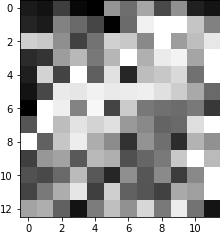

In [22]:
from IPython.display import Image
Image(filename='../Results/All_4/data/_100_image.png') 

In [23]:
ML_data_traintest2.loc[100,'Yield']

17.104999999999997

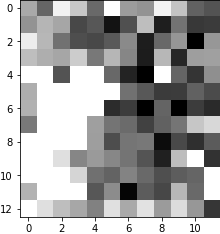

In [24]:
Image(filename='../Results/All_4/data/_23_image.png') 

In [25]:
ML_data_traintest2.loc[23,'Yield']

79.28999999999998

In [26]:
#Image(filename='../Results/All_2/optimized_feature_ranking.png') 

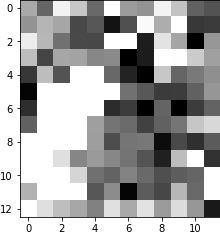

In [27]:
#Validation set
Image(filename='../Results/All_4/data/_0_image.png') 

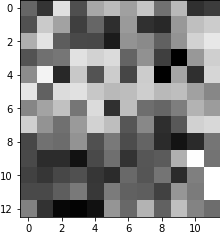

In [28]:
#Validation set
Image(filename='../Results/All_4/data/_277_image.png') 